# Cryptography (CC4017) -- Week 1

# Monoalphabetic substitution cipher

The simpliest of all ciphers is the **monoalphabetic substitution cipher**. Here, each character of the message (ciphertext) is substituted by another character by a bijective function over the alphabet: a permutation. The key of the cipher is the permutation used. For example, we could use the following table to encode:

|A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|N|O|T|V|E|R|Y|D|I|F|C|U|L|M|P|Q|S|W|X|Z|A|B|G|H|J|K|

Here to generate the key (the permutation), we used a common technique to make the key easyer to remember: we start with a phrase **NOT VERY DIFFICULT**. Remove any letter repetitions: **NOTVERYDIFCUL**, and finally add all the other unused characters by their "natural" order staring where our (transformed) phrase stopped: **NOTVERYDIFCULMPQSWXZABGHJK**.

We define an additional function **encode** that transforms any upper character in its "natural" order ($A\to 0, B\to 1,\ldots, Z\to 25$).

In [116]:
import string

key = "NOTVERYDIFCULMPQSWXZABGHJK"

def encodeOne(c):
    assert c in string.ascii_uppercase
    return ord(c)-ord('A')

def encode(w):
    return [encodeOne(i) for i in list(w)]

def decodeOne(n):
    assert 0 <= n < 26
    return chr(ord('A') + n)

def decode(w):
    return "".join([decodeOne(n) for n in w])

def cipherMonoOne(c, key):
    assert c in string.ascii_uppercase
    return key[ord(c) - ord('A')]

def cipherMono(w, key):
    return "".join([cipherMonoOne(c, key) for c in w])

def back_from_number(lst):
    orda = ord('a')
    foo = [chr(orda+c-1) for c in lst]
    return "".join(foo)

With a (not very original) message like
"A long time ago in a galaxy far, far away...

It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire.

During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, and space station with enough power to destroy an entire planet.

Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy"

After removing diacritics, punctuation and spaces we get:

In [117]:
msg = "ALONGTIMEAGOINAGALAXYFARFARAWAYITISAPERIODOFCIVILWARREBELSPACESHIPSSTRIKINGFROMAHIDDENBASEHAVEWONTHEIRFIRSTVICTORYAGAINSTTHEEVILGALACTICEMPIREDURINGTHEBATTLEREBELSPIESMANAGEDTOSTEALSECRETPLANSTOTHEEMPIRESULTIMATEWEAPONTHEDEATHSTARANDSPACESTATIONWITHENOUGHPOWERTODESTROYANENTIREPLANETPURSUEDBYTHEEMPIRESSINISTERAGENTSPRINCESSLEIARACESHOMEABOARDHERSTARSHIPCUSTODIANOFTHESTOLENPLANSTHATCANSAVEHERPEOPLEANDRESTOREFREEDOMTOTHEGALAXY"

Now, we can cipher the text using the key and the *sanitised* text message

In [118]:
ctext = cipherMono(msg, key)
print(ctext)

NUPMYZILENYPIMNYNUNHJRNWRNWNGNJIZIXNQEWIPVPRTIBIUGNWWEOEUXQNTEXDIQXXZWICIMYRWPLNDIVVEMONXEDNBEGPMZDEIWRIWXZBITZPWJNYNIMXZZDEEBIUYNUNTZITELQIWEVAWIMYZDEONZZUEWEOEUXQIEXLNMNYEVZPXZENUXETWEZQUNMXZPZDEELQIWEXAUZILNZEGENQPMZDEVENZDXZNWNMVXQNTEXZNZIPMGIZDEMPAYDQPGEWZPVEXZWPJNMEMZIWEQUNMEZQAWXAEVOJZDEELQIWEXXIMIXZEWNYEMZXQWIMTEXXUEINWNTEXDPLENOPNWVDEWXZNWXDIQTAXZPVINMPRZDEXZPUEMQUNMXZDNZTNMXNBEDEWQEPQUENMVWEXZPWERWEEVPLZPZDEYNUNHJ


To decode, it is enough to use the table in reverse order, *i.e.* substitute each character with the one that is in the upper row. This corresponds to use the inverse permutation, that can be obtained with the following code.

In [119]:
def inverseKey(key):
    nk = [0 for _ in range(26)]
    l = 0
    for i in key:
        nk[encodeOne(i)] = chr(ord('A')+l)
        l += 1
    return "".join(nk)

print(inverseKey(key))

UVKHEJWXIYZMNABOPFQCLDRSGT


Just to check that everything works...

In [120]:
nkey = inverseKey(key)
ntext = cipherMono(ctext,nkey)
assert ntext == msg
print(ntext)

ALONGTIMEAGOINAGALAXYFARFARAWAYITISAPERIODOFCIVILWARREBELSPACESHIPSSTRIKINGFROMAHIDDENBASEHAVEWONTHEIRFIRSTVICTORYAGAINSTTHEEVILGALACTICEMPIREDURINGTHEBATTLEREBELSPIESMANAGEDTOSTEALSECRETPLANSTOTHEEMPIRESULTIMATEWEAPONTHEDEATHSTARANDSPACESTATIONWITHENOUGHPOWERTODESTROYANENTIREPLANETPURSUEDBYTHEEMPIRESSINISTERAGENTSPRINCESSLEIARACESHOMEABOARDHERSTARSHIPCUSTODIANOFTHESTOLENPLANSTHATCANSAVEHERPEOPLEANDRESTOREFREEDOMTOTHEGALAXY


### How can we "crack" this?

We can begin by counting the number of occurences of each character in the ciphertext. The following function collects that information swiftly, returning a list of the ratio of occurences of each character, in alphabetic order.

In [121]:
def stats(text):
    assert len([True for c in text if c in string.ascii_uppercase]) == len(text)
    st = [0 for i in range(26)]
    for c in text:
        st[encodeOne(c)] += 1
    l = sum(st)
    return [x for x in map(lambda x: float(x/l),st)]


Because an image is (sometimes) easier to read than just a list of numbers, we will just define some usefull functions and some important data... 

In [122]:
import matplotlib.pyplot as plt

estats = [0.0827031042166906, 0.0162276080084299, 0.0304341066523865, 0.0375304461987597, 0.122672701204028, 0.0212717442001071, 0.0213201126293424, 0.0502686175266458, 0.0748777833439859, 0.00192437250600287, 0.00767676069719636, 0.0423189206930505, 0.0274732678056280, 0.0709564856881273, 0.0748432344659607, 0.0196341273817133, 0.00130594758935204, 0.0634870182590820, 0.0662509285010969, 0.0866554958627719, 0.0301577156281850, 0.0101919190174299, 0.0179861458999119, 0.00233550415450258, 0.0183247249045587, 0.00117120696505381]

def bar(sts):
    _ = plt.figure(figsize = (26, 10))
    _ = plt.bar([c for c in string.ascii_uppercase], sts, color ='Blue', width = 0.7)

The distribution of letters of the ciphertext is as follows:

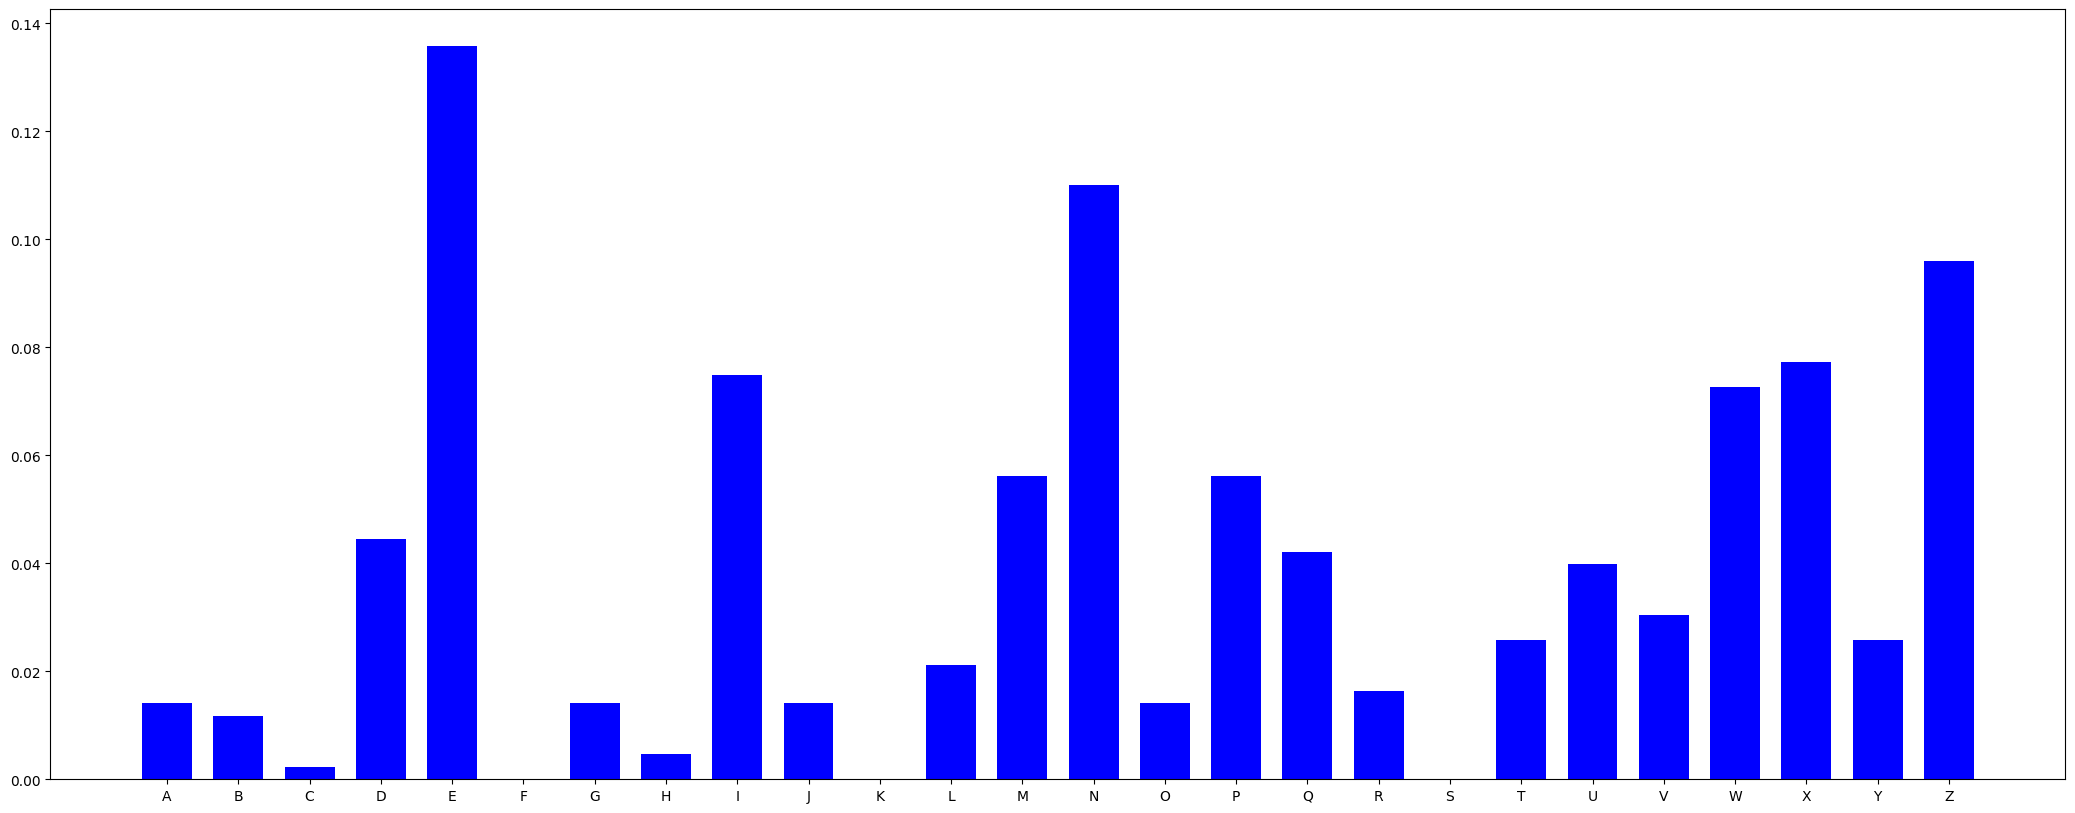

In [123]:
bar(stats(ctext))

Which is quite different from the same picture for the original message (plaintext):

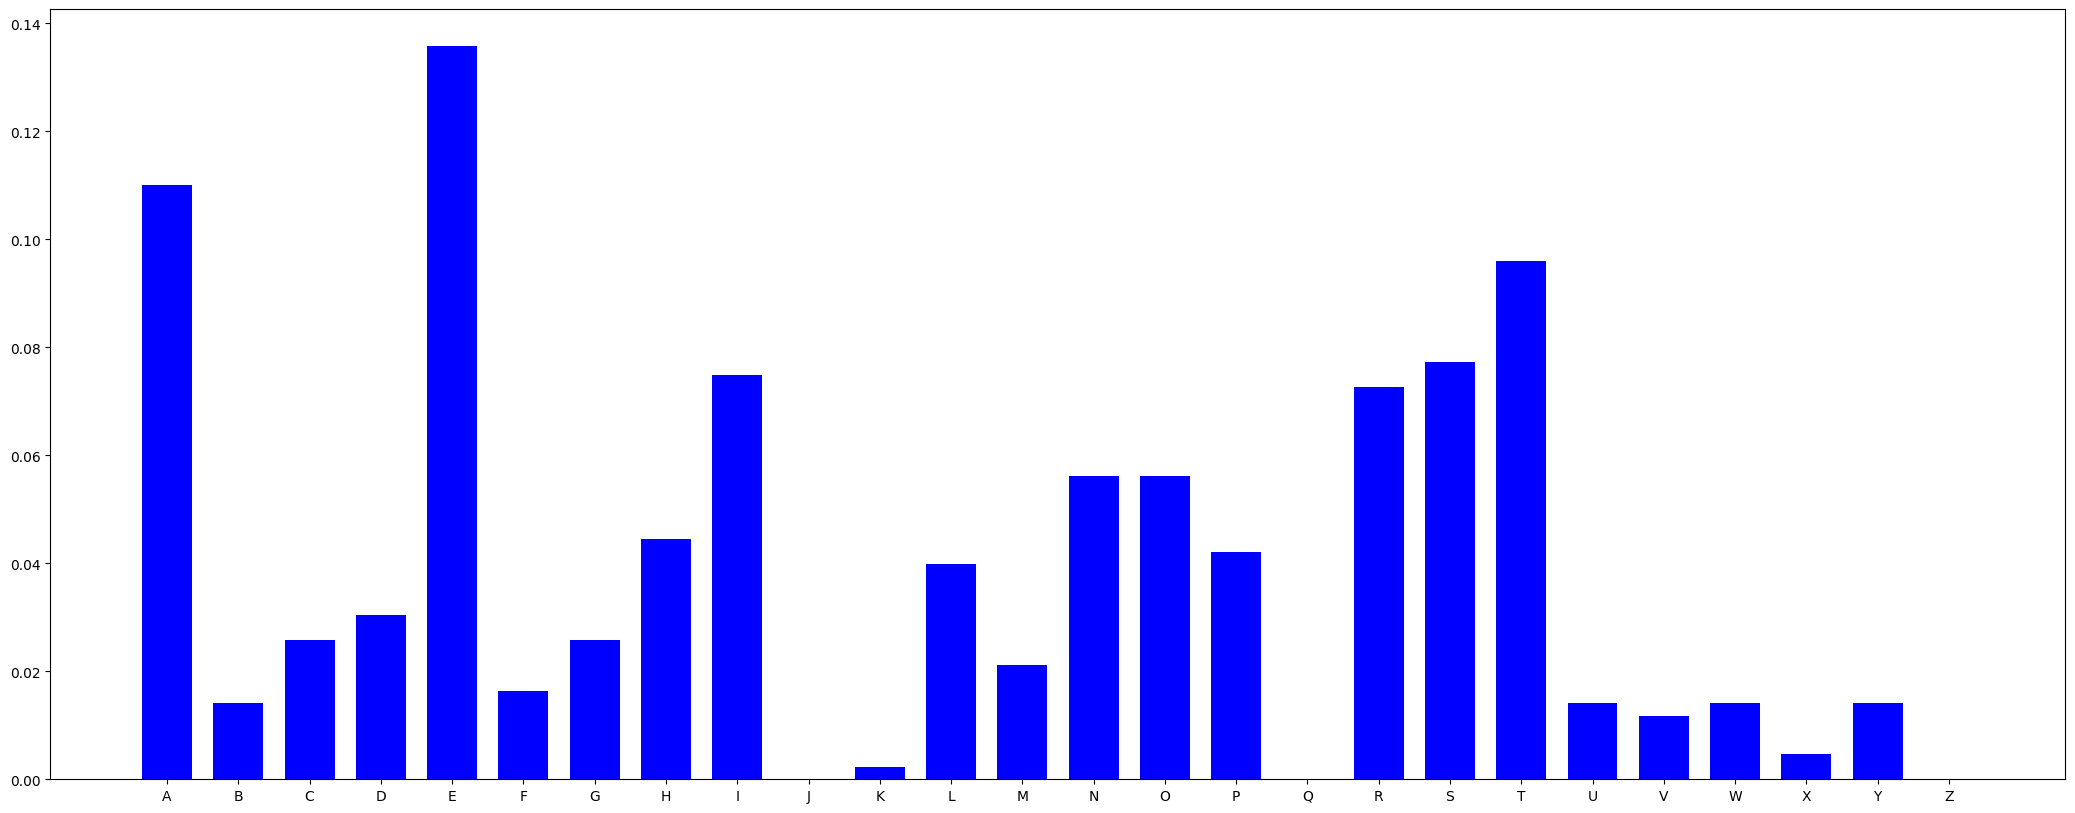

In [124]:
bar(stats(msg))

Each letter of the plaintext was always ciphered the same way. Thus the bars are just permutated. Finding the permutation is not that difficult, having these two statistics. However, to produce it we need to have access to the plaintext (and that is cheating!!).

But we do have the statistical distribution of an average english text. And we can see that *(if the message is not too short)* the picture is not that different:  

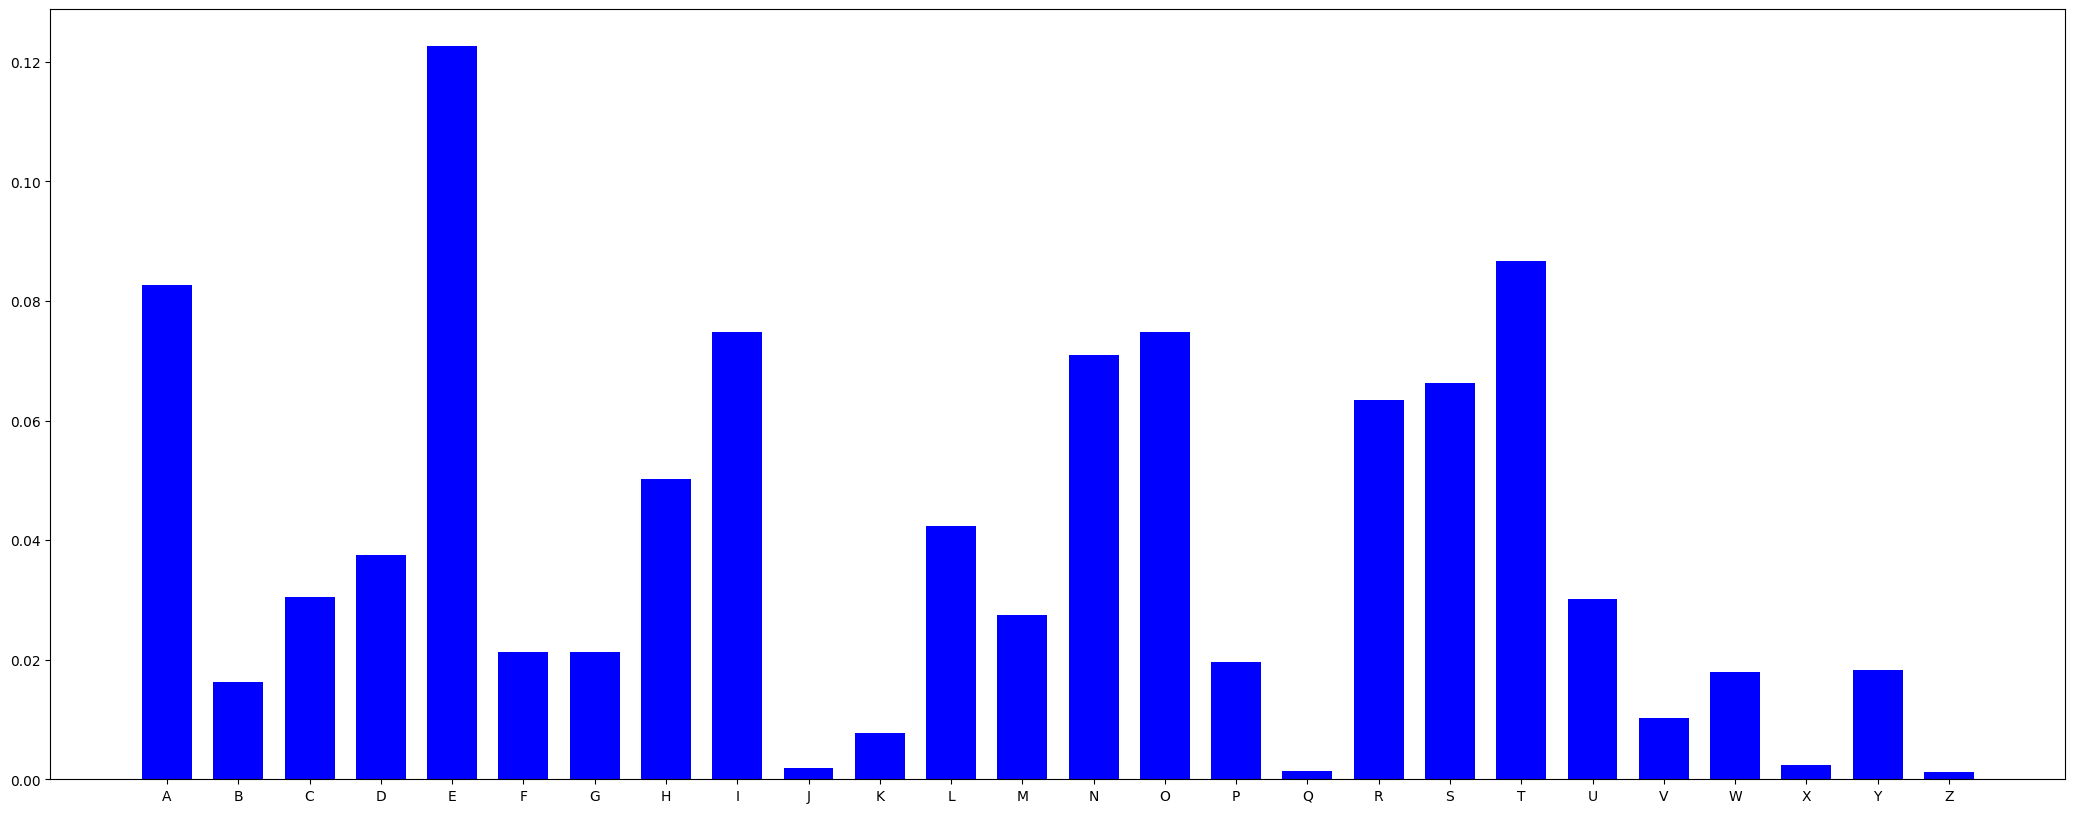

In [125]:
bar(estats)

Thus we can use this *average distribution* to attempt an attack against a **monoalphabetic substitution chipher**.

But we need to evaluate the quality of two possible solutions for the same text (without the need to use a human to check if the translation works or not).

Let $s_i$ be the average probabilities of the character $i$ occur in a text, and $p_i$ the ratio of the observable occurence of the character $i$ in a tentative translation over the total size of the text.

Then we can try to mesure the quality by 

$$D =\sum_{0\leq i\leq 25}(s_i-p_i)^2.$$

The correct translation should have a very small value of $D$ compared with the one obtained from a incorrect translation.

In [126]:
def D(text, ref):
    p = stats(text)
    return sum([(ref[i]-p[i])**2 for i in range(26)])

If we try with the correct translation, *i.e.* the original message, we have

In [127]:
correctD = D(msg,estats)
print(correctD)

0.0028236406446184316


While if we try with a **very** incorrect translation (the ciphertext), we have

In [128]:
incorrectD = D(ctext, estats)
print(incorrectD)

0.04651169210933915


This is **much** larger than the one for the correct translation

Let us generate random translations and compare the results using $D$. Because the keys generated are random, it is equivalent to use them directly or its inverses.

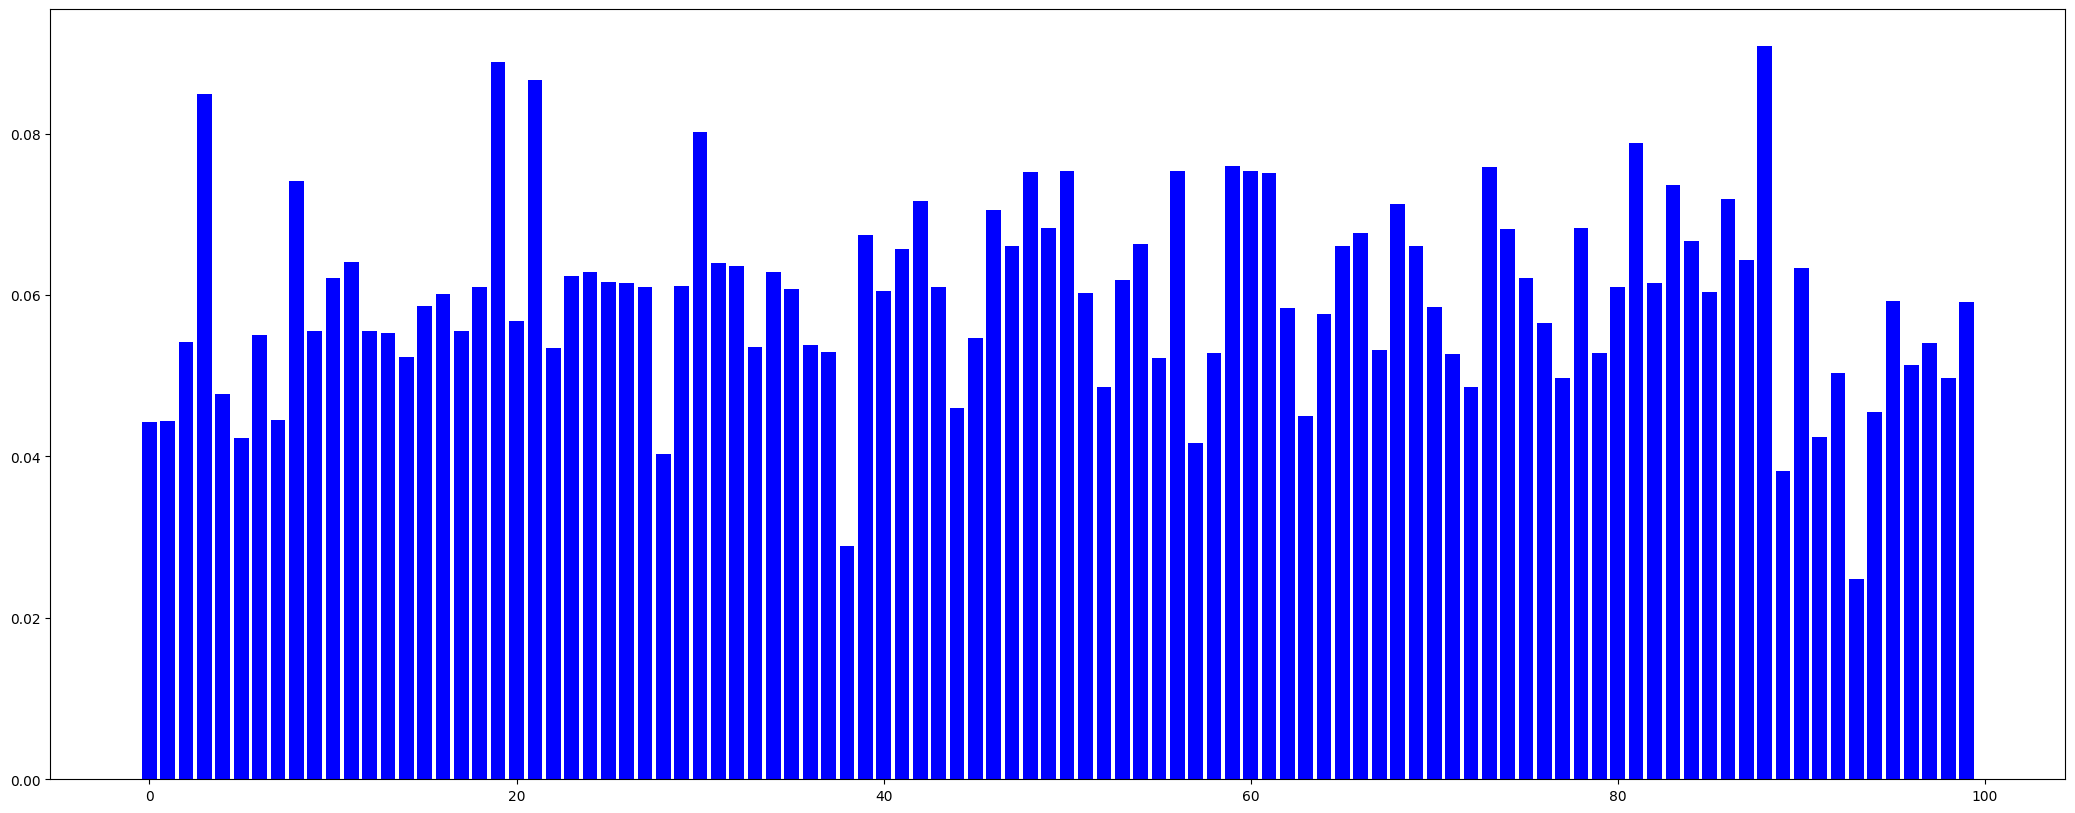

In [129]:
import random

def genRndAlph():
    """ Generates a random key (alphabet-lenghted)"""
    pool = string.ascii_uppercase
    alpha = ""
    while len(pool):
        r = random.randint(0, len(pool)-1)
        alpha += pool[r]
        pool = pool[:r]+pool[(r+1):]
    return alpha

l = list()
for i in range(100):
    k = genRndAlph()
    t = cipherMono(ctext, k)
    l.append(D(t,estats))
_ = plt.figure(figsize = (26, 10))
_ = plt.bar([x for x in range(100)],l, color ='Blue')

Altough the values vary a lot they a re considerable above the reference value for the correct answer ($\approx 0.002$)

What is the difference if we change just one letter from the correct key? Let us swap the $M$ and $N$.

In [130]:
nkey = 'MOTVERYDIFCULNPQSWXZABGHJK'
ikey = inverseKey(nkey)
ntext = cipherMono(ctext, ikey)
print(D(ntext, estats))

0.0040890843268524164


It is not as good as the correct one, but not that bad.

What happens if we start with a random key and we correct one or two characters? Let us correct the positions of $O$ and $N$...

In [131]:
key1 = 'ZPQWSUMAETOLNXHYKCGDVIFRBJ'
ikey1 = inverseKey(key1)
print(ikey1)

HYRTIWSOVZQLGMKBCXEJFUDNPA


In [132]:
ikey2 = 'NORTIWSYVZQLGMKBCXEJFUDHPA'
key2 = inverseKey(ikey2)
text1 = cipherMono(ctext, key1)
text2 = cipherMono(ctext, key2)
print(D(text1,estats))
print(D(text2,estats))

0.05772410569112609
0.03998758554878633


It is not great but the mesure has improved. Thus we can try this to implement an automatic crack of a monoalphabetic substitution message for which we do not know the key.

# Attention

### For the challenges that follow you need to set the folowing variable to be the number of your group

In [133]:
GroupNumber = 19
fname = "work"+str(GroupNumber)
import importlib
work = importlib.import_module(fname, package=None)

## Challenge 1

Try to crack the following message. Assume that it was written in english, and that was enciphered using a monoalphabetic substitution cipher.

In [134]:
ctext = back_from_number(work.msg1).upper()
print(ctext)

def count_ngrams(text, n):
    ngrams = dict()
    total = 0
    for i in range(len(text) - n + 1):
        j = i + n
        ngram = text[i:j]
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1
        total += 1

    for ngram in ngrams:
        ngrams[ngram] = 100 * ngrams[ngram] / total

    sorted_ngrams = dict(sorted(ngrams.items(), key = lambda item: item[1], reverse = True))

    return sorted_ngrams

quadrigrams = count_ngrams(ctext, 4)
trigrams = count_ngrams(ctext, 3)
bigrams = count_ngrams(ctext, 2)
unigrams = count_ngrams(ctext, 1)

print(quadrigrams, trigrams, bigrams, unigrams, sep = '\n')

key = "W**YH**J*****C*****O*******"

cipherMono(ctext, inverseKey(key))


WTTFRZFZTWVNGHHRAGVOGRHTZSOJHTWCYTKCOJKTXGVOKXHYKWAZGRTHMHMKVVHUWXKCHOJHVHTLKWCBWELKTHUGWVORWCTBHCYHRNGHHRAGVOGRWVHSSVZRHTAHCAHOJWOKTYWOHYSRZXOJHTORHHORKZOTZSWRZGCYOJHTOZCHMWVVKCCKCCHMEZRQOJHZRKBKCTZSOJKTAGVOGRWVXZIHXHCOKCAZVYMWRHAZCZXKATWCYFZVKOKATWCYOJHHXHRBHCAHZSIKLRWCOTZAKWVXZIHXHCOTZSWSRKAWCWXHRKAWCTVWOKCZTMZXHCWCYEZGOJAWCLHBVKXFTHYOJRZGBJYZAGXHCOWRESKVXWCYOJHGCYHRBRZGCYFRHTTZSOJHOKXHTAJKAWBZTHHYLHRQHVHELWRLRWOWCYHWTOIKVVWBHZOJHRKCVKOHRWREFRZYGAOKZCTFHAKSKAWVVEBWEXWVHMRKOKCBLHBKCTMKOJRZLHROYGCAWCKCJKTXWCKSHTOZWCYBKCTLHRBKCJZMVLZOJLHAWXHKAZCTOZTBWEFZHOTXZTOFRZXKCHCOCHMEZRQFZHOTMHRHSRWCQZJWRWDWXHTXHRRKVVWCYDWXHTTAJGEVHRVHTLKWCMRKOHRTVKQHHVKPWLHOJLKTJZFWCCHTHUOZCWCYXGRKHVRGQHETHRMHRHWVRHWYEMHVVHTOWLVKTJHYWCYMHRHDZKCHYLESHXKCKTOLKTHUGWVLHWOTWCYHXHRBKCBFZTOTOZCHMWVVMRKOHRTVKQHRZLKCXZRBWCWCYWGYRHVZRYKCOJHWOHRBWEVHTLKWCORWCTBHCYHRMRKOHRTWCYFHRSZRXHRTMHRHFWROKAGVWRVEIKTKLVHOJHJKBJAWXFZSOJHOJHWOHRZSOJHRKYKAGVZGTWCYOJHWCOKMWRJKFFKHRZAQYRWXWTZSOJHFWCTHUGWVSGBTMKVVLHVZZQHYWOKCHWRVESKVXWCYRHAZ

TypeError: sequence item 0: expected str instance, int found

# The Vigenère cipher

The "Vigenère cipher" (1) is a periodic polyalphabetic substitution cipher. This means that, although it is a substitution cipher, the performed substitution is not the same along all the text.

To simplify, let us suppose that our input alphabet contains only the upper case letters of the western alphabet, and that it is coded numerically as follows: 𝐴=0,𝐵=1,…𝑍=25. 

The _key_ of criptogram is, for this cipher, a word, for example "SECRET". This key, if coded in the same manner described before, has the value [18, 4, 2, 17, 4, 19]

(1) This is the usual name given to this cipher although it is not the cipher proposer by Vigenère. On his book he gives this cipher as an example of a weak cipher for which he proposes a much more interesting alternative. Not to add any further confusion, we will call to commonly referred "Vigenère cipher" **classical Vigenère**, and we will add sobe additional adjective if we want to refer to any other variation (namelly the one introduced by Vigenère).

In [60]:
key = encode("SECRET")
print(key)

[18, 4, 2, 17, 4, 19]


The classical way to define the **classical Vigenère** cipher is using the following table

|   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **A** | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   |
| **B** | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |
| **C** | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   |
| **D**  | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   
| **E** | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   
| **F** | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   | D   | E   | 
| **G** | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   
| **H** | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   |
| **I** | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   |
| **J** | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   | D   | E   | F   | G   | H   | I   | 
| **K** | K   |  L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   | D   | E   | F   | G   | H   | I   | J   |
| **L** | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   |
| **M** |  M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   |
| **N** | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   |
| **O** | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   |
| **P** | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   |
| **Q** | Q   | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   |
| **R** | R   | S   | T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   |
| **S** |  S   | T   | U   | V   | W   | X   | Y   | Z   | A   |B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   |
| **T** |T   | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | 
| **U** | U   | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   |
| **V** | V   | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   |
| **W** | W   | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   |
| **X** | X   | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   |
| **Y** | Y   | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   |U   | V   | W   | X   | 
| **Z** | Z   | A   | B   | C   | D   | E   | F   | G   | H   | I   | J   | K   | L   | M   | N   | O   | P   | Q   | R   | S   | T   | U   | V   | W   | X   | Y   |


This is what is commonly called a *tabula recta*.

To encipher the text "Tomorrow I will not come to the classes because is Saturday." with our key ("SECRET"), we proceed as follows:
1. Convert the plaintext (our message) to uppercase removing any diacritics and punctuation. Thus, the message becomes "TOMORROWIWILLNOTCOMETOTHECLASSESBECAUSEISSATURDAY".

2. Then we inscribe over the message the key, repeating it as necessary":

|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|E|C|R|E|T|S|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T   | O   | M   | O   | R   | R   | O   | W   | I   | W   | I   | L   | L   | N   | O   | T   | C   | O   | M   | E   | T   | O   | T   | H   | E   | C   | L   | A   | S   | S   | E   | S   | B   | E   | C   | A   | U   | S   | E   | I   | S   | S   | A   | T   | U   | R   | D   | A   | Y   |

3. Now we substitute each letter X of the message with a corresponding key letter Y, by the one in the column staring with X and the line starting with Y.

For example, the begining of the message would become: "LSOF..."


But because we are using a numerical encoding this becomes much simpler.

Let $T(i)$ represent the numerical code of the $i$th letter of the message, $K(j)$ the numerical code of the key and $C(i)$ represents the corresponding numerical code for the resulting enciphered message. Then if $k$ is the length of the key we have

$$C(i) = (T(i) + K(i \mod k))\mod{25}$$

For decoding we will have

$$T(i) = (C(i) - K(i \mod k))\mod{25}$$


In [61]:
def cipherVigenere(text,key):
    etext, ekey = encode(text), encode(key)
    szkey = len(ekey)
    return "".join([decodeOne((etext[i] + ekey[i % szkey]) % 26) for i in range(len(etext))])

def decipherVigenere(text,key):
    etext, ekey = encode(text), encode(key)
    szkey = len(ekey)
    return "".join([decodeOne((etext[i] - ekey[i % szkey]) % 26) for i in range(len(etext))])
    

In [62]:
text = "TOMORROWIWILLNOTCOMETOTHECLASSESBECAUSEISSATURDAY"
key = "SECRET"

ctext = cipherVigenere(text, key)
print(ctext)

ntext = decipherVigenere(ctext,key)
print(ntext)

LSOFVKGAKNMEDRQKGHEIVFXAWGNRWLWWDVGTMWGZWLSXWIHTQ
TOMORROWIWILLNOTCOMETOTHECLASSESBECAUSEISSATURDAY


What happens to the character frequency statistics of a Vigenere criptogram?

This is a periodic cipher. Specifically, its period is the size of the key. Let this period be denoted by $P$. Thus, every two characters $kP$ positions apart, for every $k\in\mathbb{N}$, are going to be "enciphered with the same line of the table", *i.e.* with the same monoalphabetic substitution cipher. Thus, as we saw, will have a statistical distribution that differs from the English average distribution by a permutation of the values (in this case, a circular permutation). 

### Index of Coincidence (I)

To compare two distributions and evaluate how distant they are one from each other, we can use the a similar way to the one used before to evaluate the quality of deciphering of a monoalphabetic cipher. However, instead of using the english average as reference, let us use the uniform distribution, *i.e.* the distribution where all the letters are equiprobable. 

$$I' = \sum_{0\leq i\leq 25}\left(\frac1{26}-p_i\right)^2.$$

But 

$$I' = \sum_{0\leq i\leq 25}\left(\frac1{26}-\frac{f_i}{t}\right)^2.=\sum_{0\leq i\leq 25}\left(\frac1{26^2}-\frac2{26}\frac{f_i}{t}+\frac{f_i^2}{t^2}\right)= \frac1{26}-\frac2{26}\sum_{0\leq i\leq 25}p_i+\sum_{0\leq i\leq 25}p_i^2=\sum_{0\leq i\leq 25}p_i^2-\frac1{26}.$$

Because this is just "affected" by the constant $\frac1{26}$, it is standard to use, what is normaly called the **Coincidence Index ($I$)** 

$$I = I'+\frac1{26}=\sum_{0\leq i\leq 25}p_i^2.$$

$I$ measures the "ammount of information" that a text has, as it measures the distance from the uniform distribution (the one that is completely random).

In [63]:
def I(st):
    return sum([i**2 for i in st])

If we use this mesure on the average statistics for the english language...

In [64]:
print(I(estats))

0.06476744293566436


In some sense, it is the highest value of $I$ that we can expect to obtain for a message written in english. Call this value $I_E$

What happens if we evaluate the same $I$ on a ciphertext resulting of the application of a Vigenère cipher. If we consider the sets of characters in positions $\{i\mid  i\equiv k\pmod{P}\}$ where $P$ is size of the key and $0\leq k< P$, we know that, for each $k$ all those characters were enciphered by the same mono-alphabetical cipher and thus will have an $I$ very similar to $I_E$, as all these statistics will have the same values, but corresponding to different letters (because of the permutation induced by the mono-alphabetic substitution). Since, for different values of $k$, the permutations are different, it is expectable that some high frequencies, for a value of $k$, may correspond to a lower frequency for a different value of $k$, thus producing an "smoothing" effect of the statistics, and thus a lower value of $I$.   

Let us try an example. Consider the message used for the mono-alphabetic case and let us compute $I$ for the result of a Vigenère with a key of size $1$ (thus just a mono-alphabetic substitution).

In [65]:
key = "M"
print(I(stats(cipherVigenere(msg,key))))

0.07222657942510516


It may be surprising that the $I$ value is higher that $I_E$ (**!!!**) This is due to the simple fact that the message is too short to be significant when compared with something that is the average considering many millions of characters. 

Now let us do the same for a key of size $2$

In [66]:
key = "MN"
print(I(stats(cipherVigenere(msg,key))))

0.05603606667068869


The $I$ behaves as expected and the value is lower...

Now with a key of size $3$

In [67]:
key = "MNO"
print(I(stats(cipherVigenere(msg,key))))

0.05151676365251824


Even lower...

But what happens if there is a repetition of a character in the key?

In [68]:
key = "MNM"
print(I(stats(cipherVigenere(msg,key))))

0.05728655342814361


It is very similar to the result obtained with the key "MN". The value of $I$ lowers with the **number of different letters** in the key, **not with the size of the key**.

#### Number of different letters in the key of a Vigenère

It is expected that (for a sufficiently large criptogram) the values of $CI$, for the english language, vary with the number of different letters in the key of a Vigenère cipher according with the following table:

| # | $I$ |
|---|---|
|1|0.0647|
|2|0.0520|
|3|0.0473|
|4|0.0449|
|5|0.0435|
|6|0.0426|
|7|0.0419|
|8|0.0414|
|9|0.0410|
|10|0.0407|
||...|
|26|$\frac1{26}$|

### How can we try to guess the size of a key for a Vigenère criptogram?

#### Babbage's method

We can try to find sequences of characters that appear repeated over the ciphertext. Those can occur due two reasons:

1. By simple chance, that is, product of different strigs of the plaintext that enciphered, by different "rows of the table", happened to result in the same string in the ciphertext.
1. Because in the plaintex, at a distance that is a multiple of the period $P$ of the cipher occur different copies of the same string that, because of that particular distance, will be enciphered exactly in the same manner, giving rise of the same strings in the ciphertext.

If the size of the repeated patterns is large enough (3 or above) the probability of the second hipothesis is much higher than the first.



If we consider the following criptogram *"MYCCWFVATQSBWCQSNZPNKSOGVMEOLQKVHXIMCSGYAQCUSUIWAMMEFTRQYGEQORGWYBFGIHUXWCWRECBQTVRSUZOOHUTNJTMAAHWUUETXHEGJXSFBFNQSNWCIFGVTUHVZVQXNQIYORAEYDRRJHUAUIXQOOIJXRFTRQYGEYQFAPDMTSSJAFHTQXFSRHQGDAQZFHDJTRSBFUESHKXGWBQFRKTQBBBIXQQSPJTFHPHMARHFMPSHJMGWDDIVHWUZBIVXBBKTHFBRTIFECNQZRBIYDRDAQZRHEKDFITTNLHWUQZDXHQFGXDUFHTHMTSCJECFXDORGHBQVOGQORGWEYROQEMERWUDFHPHEUWESGFHDTUNBDVFUSHJAYSCFXNBHJTNHRQZFOKUTRFEUACZTQZQFTIFBFTVDRSSEYGCIXQTOAQJL"*
the result of this repetition of patterns of size 4 is as follows:

|pattern| |
|-------|-|
|FTRQ|105|
|TRQY|105|
|RQYG|105|
|QYGE|105|
|QORG|270|
|ORGW|270|
|DAQZ|90|
|FHPH|120|

The period size of the cipher needs to divide all these distances (assuming that all the repetitions are due to the reason 2). The common divisor to all these distancies is 15. Thus the possible periods are **3**, **5** or **15**. With very good probability, these are the only periods that we need to try.

## Chalenge 2

Write a python method that, given a Vigenère cryptogram, finds the possible list of periods, using this method. Test it in the following criptogram:

In [69]:
msg2 = back_from_number(work.msg2)
print(msg2)

pabiwlewbtqnjmnkhrabdkjpdncajppvmlnkiprlrrabrfjaxilhzohmfxbfatnqfjxvnmmbambunxcojrgfhmgnfiizjgxdtvmxwnjmnkhrabdkfitnoetotalxsztbqtyfhljmjauzxfyetackjbizrhypdnjktrclcajpiwwxbxatrgsfcvnpdlgscajlgqpbspdncanprcumzoptvhabbmwmnkrwuwbxgmlhslbqllfksxxenqxkbtsaipnxrbgonghbdnebgopvcltzxiuftstungypdnjywfriwtrbgqltspaicbslhexfjkpvmrtripltsytoubrmhmmmmodcpailrcvxsqpzhynibiwwyetcwwjovzxnsaeznlxlubqxyfbmbvmfriphxbtlkxwhttnrgxgjatyxclntxqkquefdtwcajoxvubybgiaruodldvyfdvbijzxnrvfiagptdjptnpwfiqwzgbvqwlbfipahgbgbmnszpvrgmfhujgnctachfksorgxytzpbsedeuutqwjnvfjtqlhspiwbzfvewnmxjdaciwlbqwxsqcmfrtozxxxyplmaxkopvthmxgistrbhunkwfatjgigpunlxzwchejoambunxceabybgaubpbttrsfytbqunpwwytsktanqylciwwrrgqnewrzmhljolmaxfigmjwdtttuxxqpjubxetljgittznctfcmmudcturgnpijrljujiuujxiajgibbmaznkvxxlypiwwxbxatfknqtzbenhtzxunkbwazfkpvmtzagmuhwaxvcajximazfvambunxcbatspvmwwjolzrmjohiwwubgnxkrbgafxwbeiamnzjtjkqvkqbbgitbqxmfvpltrmdncajqwmjmjodncajoxlrvzidcbtsaipntsqxejkmfexrxwlrsmkfjpaxyyetxjgxbmcjekrvafbqiqmuhthtljmnktiaedcxtvtsagmlh

### (Again) the Index of Coincidence

The value $I$ of a given text is $$\sum_{0\leq i\leq 25}p_i^2,$$ where $p_i$ stands for the ratio between the number of occurences of the character $i$ and the total lenght of the text. Thus $p_i$ stands for the probability of, in a given position, occuring the leter $i$. But then, $p_i^2$ is the probability of, in two given postions, having the same character $i$. Thus, $I=\sum_{0\leq i\leq 25}p_i^2$ is the probability of, in two chosen positions, having the same letter, regardless of which letter.

This observation makes possible to have another method to obtain the period of a Vigenère ciphertext.

Consider two texts $T_1$ and $T_2$, suppose that they are of the same lenght, and write them one over the other.

|A|O|N|G|T|I|M|E|A|G|O|I|N|A|G|A|L|A|X|Y|F|A|R|F|A|R|A|W|A|Y|I|T|I|S|A|P|E|R|I|O|D|O|F|C|I|V|I|L|W|A|R|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|L|E|T|I|T|B|E|F|I|F|T|E|E|N|T|H|O|U|S|A|N|D|W|H|Y|C|O|U|L|D|N|T|H|E|Y|E|S|T|E|R|D|A|Y|H|A|V|E|P|R|E|D|
|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|1|0|0|0|0|1|0|0|0|0|0|

And count the number of columns where the character in the upper row coincides with the one in the lower row (as showned above). In this case the result is $4$ and the total length of the text is $51$, giving a ratio of $\frac{4}{51}\approx 0.078$, that is not that different from the value $I_E$. The lack of approximation to $I_E$ is (again) due to the fact that the texts are very small. 

Let $S(T_1,T_2)$ be this ratio: the number of coincidences over the size of the texts.

If $T_2$ is a text in another language or, more generally, a text with a different distribution, the correspondent value of $I$ will be (probably) lower.

Now consider an operator $L_i$ that performes a left-shift-cicle of $i$ position on a text and colect the values of $S(T,L_i(T))$ for $i=1,2,\ldots$, for a Vigenére ciphertext. Whenever $i$ is a multiple of the period of the cipher the value should be maxed. Thus the distance of two peaks should be the value of the period.


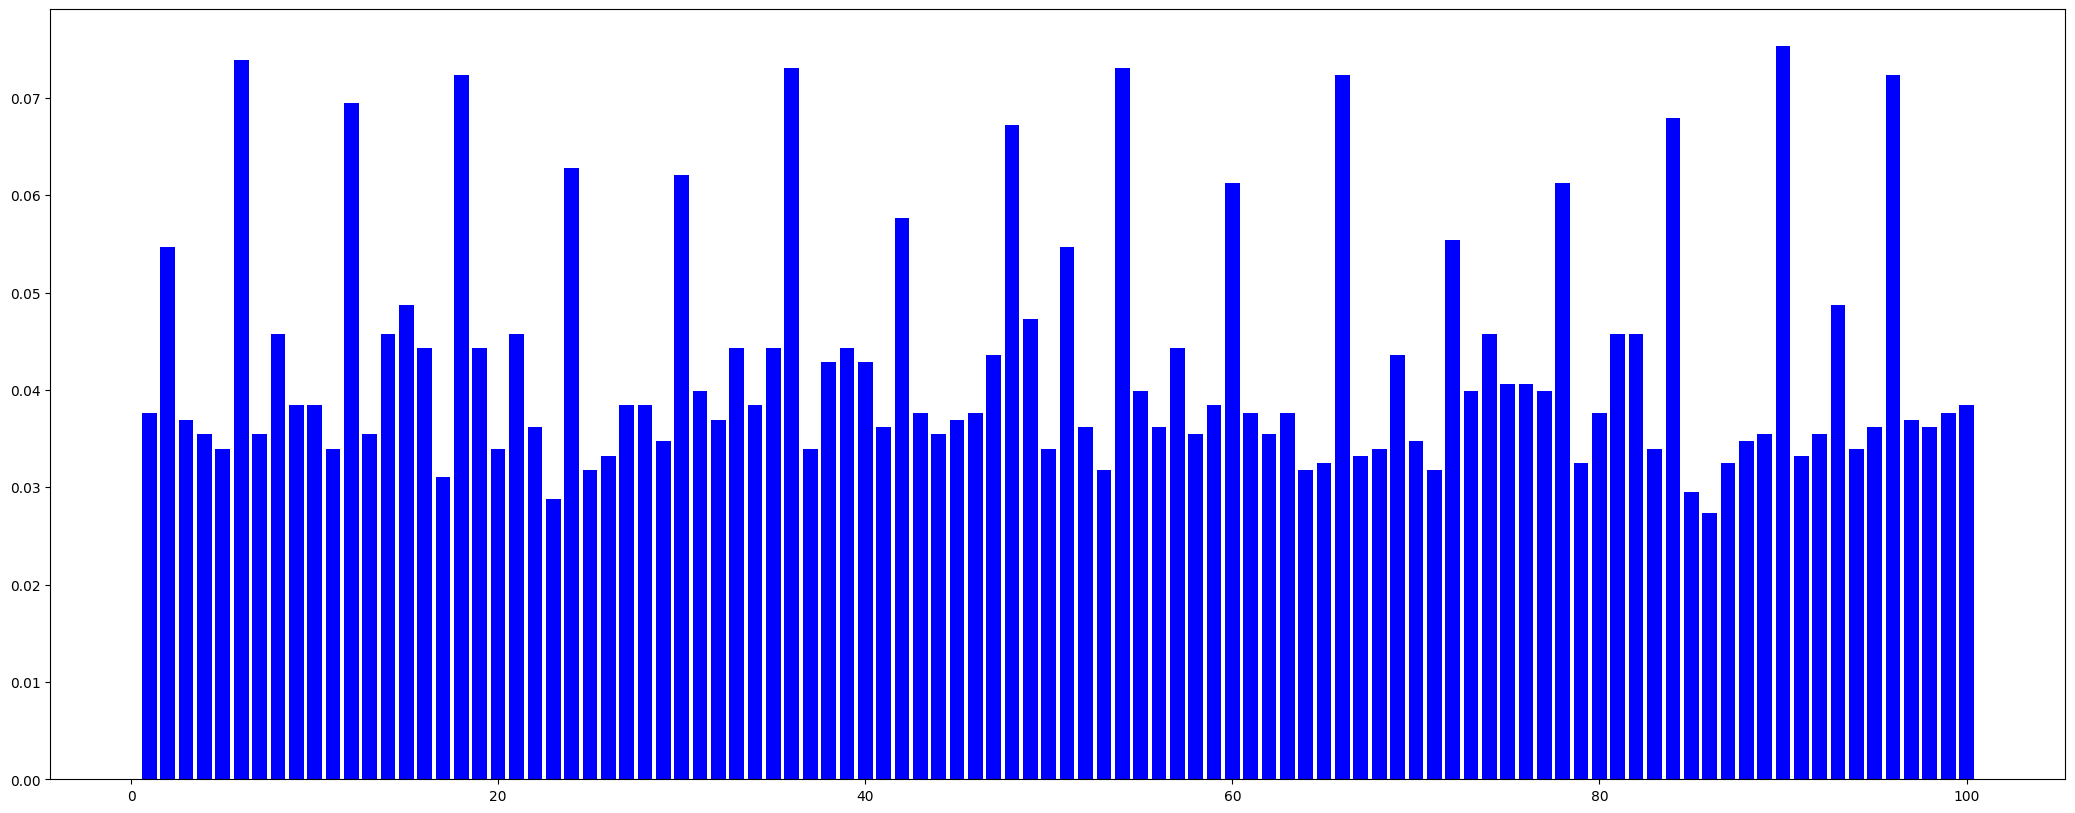

In [70]:
l = [0.03766617429837518, 0.05465288035450517, 0.03692762186115214, 0.03545051698670606, 0.033973412112259974, 0.07385524372230429, 0.03545051698670606, 0.04579025110782865, 0.03840472673559823, 0.03840472673559823, 0.033973412112259974, 0.06942392909896603, 0.03545051698670606, 0.04579025110782865, 0.04874446085672083, 0.04431314623338257, 0.0310192023633678, 0.0723781388478582, 0.04431314623338257, 0.033973412112259974, 0.04579025110782865, 0.0361890694239291, 0.02880354505169867, 0.06277695716395865, 0.03175775480059084, 0.03323485967503693, 0.03840472673559823, 0.03840472673559823, 0.03471196454948301, 0.0620384047267356, 0.03988183161004431, 0.03692762186115214, 0.04431314623338257, 0.03840472673559823, 0.04431314623338257, 0.07311669128508123, 0.033973412112259974, 0.04283604135893648, 0.04431314623338257, 0.04283604135893648, 0.0361890694239291, 0.05760709010339734, 0.03766617429837518, 0.03545051698670606, 0.03692762186115214, 0.03766617429837518, 0.04357459379615953, 0.0672082717872969, 0.047267355982274745, 0.033973412112259974, 0.05465288035450517, 0.0361890694239291, 0.03175775480059084, 0.07311669128508123, 0.03988183161004431, 0.0361890694239291, 0.04431314623338257, 0.03545051698670606, 0.03840472673559823, 0.061299852289512555, 0.03766617429837518, 0.03545051698670606, 0.03766617429837518, 0.03175775480059084, 0.03249630723781388, 0.0723781388478582, 0.03323485967503693, 0.033973412112259974, 0.04357459379615953, 0.03471196454948301, 0.03175775480059084, 0.055391432791728215, 0.03988183161004431, 0.04579025110782865, 0.04062038404726736, 0.04062038404726736, 0.03988183161004431, 0.061299852289512555, 0.03249630723781388, 0.03766617429837518, 0.04579025110782865, 0.04579025110782865, 0.033973412112259974, 0.06794682422451995, 0.029542097488921712, 0.027326440177252585, 0.03249630723781388, 0.03471196454948301, 0.03545051698670606, 0.07533234859675036, 0.03323485967503693, 0.03545051698670606, 0.04874446085672083, 0.033973412112259974, 0.0361890694239291, 0.0723781388478582, 0.03692762186115214, 0.0361890694239291, 0.03766617429837518, 0.03840472673559823]
_ = plt.figure(figsize = (26, 10))
_ = plt.bar([x for x in range(1,101)],l, color ='Blue')

This makes us conclude that the period must be 6.

## Chalenge 3

Crack the following Vigenère criptogram

In [71]:
msg3 = work.msg3
print(msg3)

[174, 59, 205, 3, 261, 143, 146, 31, 3, 6, 118, 118, 171, 258, 258, 90, 90, 199, 87, 261, 3, 62, 205, 118, 3, 87, 146, 3, 171, 6, 62, 286, 283, 62, 59, 233, 286, 59, 87, 205, 59, 230, 174, 59, 6, 146, 59, 289, 286, 118, 31, 205, 261, 90, 62, 283, 59, 115, 258, 118, 62, 199, 6, 227, 115, 286, 31, 115, 205, 230, 230, 230, 62, 59, 6, 90, 6, 230, 59, 87, 6, 261, 59, 289, 62, 230, 233, 34, 90, 199, 87, 146, 199, 255, 174, 227, 233, 118, 286, 227, 146, 230, 31, 115, 199, 171, 6, 233, 171, 90, 199, 255, 230, 283, 87, 115, 174, 90, 174, 227, 205, 261, 146, 146, 59, 230, 62, 118, 233, 261, 59, 205, 286, 59, 227, 3, 59, 227, 90, 31, 233, 118, 261, 289, 87, 115, 286, 90, 230, 283, 31, 255, 199, 34, 255, 174, 87, 233, 3, 227, 3, 199, 87, 230, 174, 205, 261, 202, 233, 146, 87, 227, 115, 115, 171, 90, 146, 143, 230, 6, 289, 118, 87, 34, 171, 233, 286, 199, 146, 87, 143, 118, 62, 227, 199, 59, 261, 90, 174, 227, 199, 118, 230, 59, 233, 227, 286, 34, 90, 59, 230, 90, 3, 143, 202, 118, 233, 233, 286, 2